In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df=pd.read_csv("Advertising.csv")
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
#DATA ANALYSIS 
df.shape

(200, 5)

In [5]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


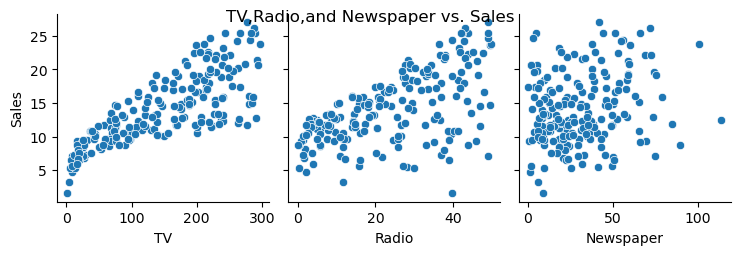

In [6]:
sns.pairplot(df,x_vars=['TV','Radio','Newspaper'],y_vars='Sales',kind='scatter')
plt.suptitle("TV,Radio,and Newspaper vs. Sales")
plt.show()

<Axes: title={'center': 'TV ad'}, ylabel='Frequency'>

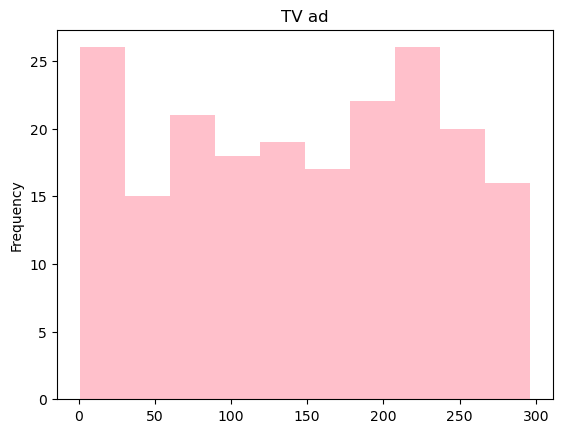

In [8]:
df['TV'].plot.hist(bins=10,color="pink",title="TV ad")

<Axes: title={'center': 'Radio ad'}, ylabel='Frequency'>

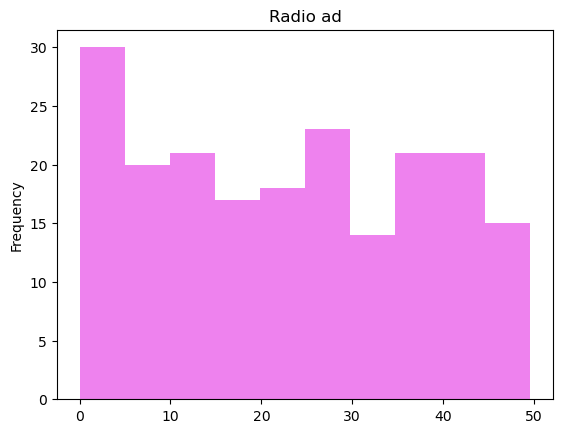

In [12]:
df['Radio'].plot.hist(bins=10,color="violet",xlabel="Radio",title="Radio ad")

<Axes: title={'center': 'Newspaper ad'}, ylabel='Frequency'>

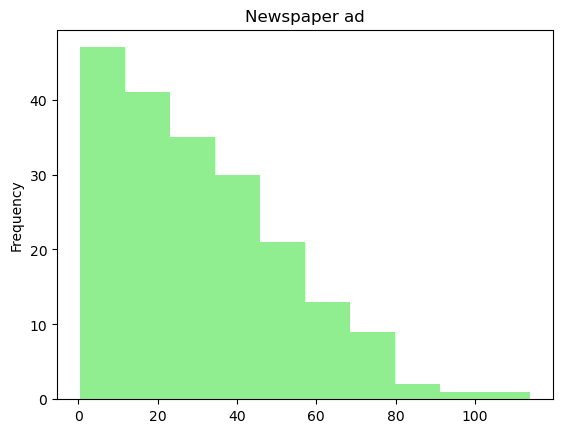

In [13]:
df['Newspaper'].plot.hist(bins=10,color="lightgreen",xlabel="Newspaper",title="Newspaper ad")

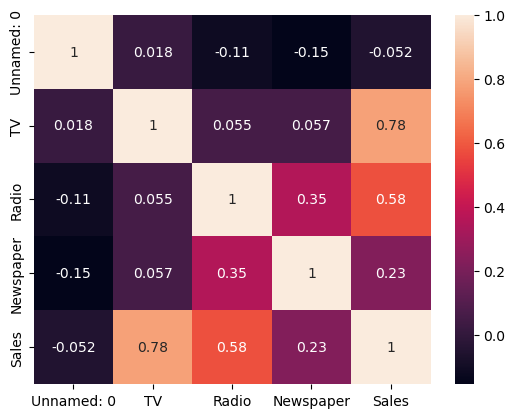

In [15]:
#Correlation Heatmap
sns.heatmap(df.corr(),annot= True)
plt.show()

In [16]:
#TRAIN AND TEST DATA SPLIT
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df[['TV']],df[['Sales']],test_size=0.3,random_state=0)

In [17]:
X_train.shape

(140, 1)

In [18]:
print(X_train)

        TV
131  265.2
96   197.6
181  218.5
19   147.3
153  171.3
..     ...
67   139.3
192   17.2
117   76.4
47   239.9
172   19.6

[140 rows x 1 columns]


In [19]:
X_test.shape

(60, 1)

In [20]:
print(y_test)

     Sales
18    11.3
170    8.4
107    8.7
98    25.4
177   11.7
182    8.7
5      7.2
146   13.2
12     9.2
152   16.6
61    24.2
125   10.6
180   10.5
154   15.6
80    11.8
7     13.2
33    17.4
130    1.6
37    14.7
74    17.0
183   26.2
145   10.3
45    14.9
159   12.9
60     8.1
123   15.2
179   12.6
185   22.6
122   11.6
44     8.5
16    12.5
55    23.7
150   16.1
111   21.8
22     5.6
189    6.7
129    9.7
4     12.9
83    13.6
106    7.2
134   10.8
66     9.5
26    15.0
113   15.9
168   17.1
63    14.0
8      4.8
75     8.7
118   15.9
143   10.4
71    12.4
124   19.7
184   17.6
97    15.5
149   10.1
24     9.7
30    21.4
160   14.4
40    16.6
56     5.5


In [23]:
#MODEL BULDING
#LINEAR REGRESSION MODEL
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [24]:
#model coeeficients
model.coef_

array([[0.04581434]])

In [27]:
#model intercept
model.intercept_

array([7.31081017])

In [29]:
#finding the sales
#Sales = be^ta0 + be^ta1*Tv
#be^ta0=intercept,be^ta1=coefficient
#Sales = 0.04581434 * Tv + 7.31081017
0.04581434*69.2+7.31081017

10.481162498

In [32]:
#prediction of sales of test set
y_pred=model.predict(X_test)
print(y_pred)

[[10.48116264]
 [ 9.60152727]
 [11.4524267 ]
 [20.58322509]
 [15.1084112 ]
 [ 9.8855762 ]
 [ 7.70939494]
 [18.31083372]
 [ 8.40119151]
 [16.36372418]
 [19.28209777]
 [11.3058208 ]
 [14.48533615]
 [15.91474363]
 [10.81102591]
 [12.81769409]
 [19.47909945]
 [ 7.3428802 ]
 [10.73314153]
 [17.08759078]
 [20.48701497]
 [13.73856237]
 [15.33290148]
 [13.34455903]
 [ 9.76187747]
 [12.95055569]
 [14.89766523]
 [16.70275031]
 [17.57322281]
 [ 8.46075015]
 [10.41702256]
 [16.42328282]
 [20.17089601]
 [18.38413667]
 [ 7.91555948]
 [ 8.16753836]
 [10.04134496]
 [15.59404323]
 [10.44451117]
 [ 8.45616872]
 [ 9.00135939]
 [ 8.75396194]
 [13.85767966]
 [16.91349628]
 [17.17921947]
 [12.01594311]
 [ 7.70481351]
 [ 8.08507255]
 [13.06967298]
 [12.10299036]
 [12.34122494]
 [17.82520169]
 [18.93849021]
 [15.78188203]
 [ 9.35871126]
 [10.16504368]
 [20.72983099]
 [15.21378419]
 [16.58821446]
 [ 7.64525486]]


In [30]:
#one test observation
0.04581434*69.2+7.31081017

10.481162498

In [33]:
# Calculate residuals
residuals = y_test - y_pred

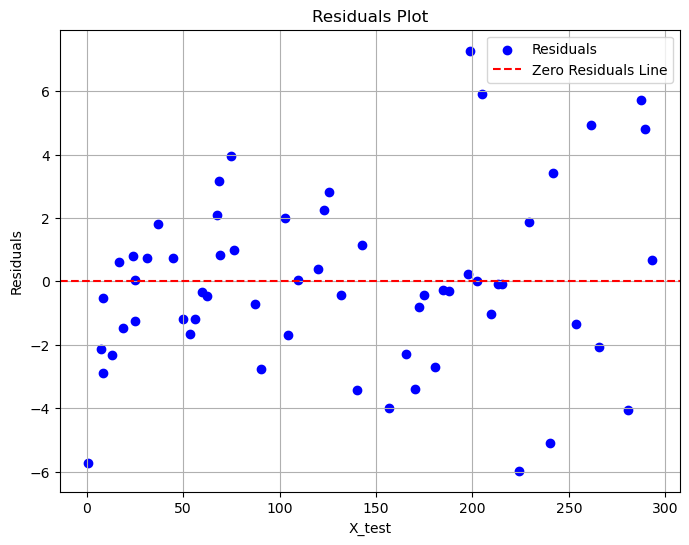

In [34]:
# Plot residuals
plt.figure(figsize=(8, 6))
plt.scatter(X_test, residuals, c='blue', marker='o', label='Residuals')
plt.axhline(y=0, color='red', linestyle='--', label='Zero Residuals Line')
plt.xlabel('X_test')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.legend()
plt.grid(True)
plt.show()

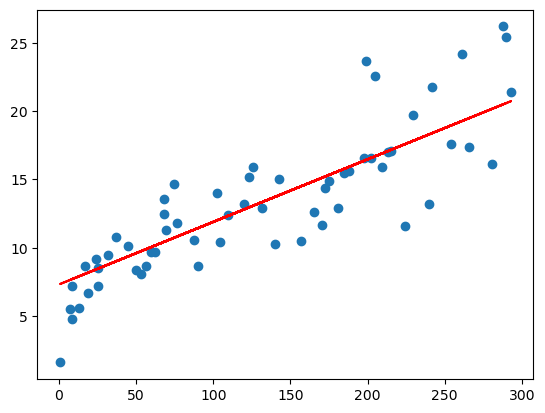

In [35]:
plt.scatter(X_test,y_test)
plt.plot(X_test,0.04581434*X_test+7.3108101,'r')
plt.show()